# Prevendo o Nível de Satisfação dos Clientes do Santander

## Definição do Problema de Negócio

Identificar clientes insatisfeitos no início do relacionamento com o Banco Santander

## Importando pacotes necessários para o código

In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #importando o pacote pandas
import numpy as np #pacote numérico numpy
from scipy import stats
import time
import pickle

#SMOTE
from imblearn.over_sampling import SMOTE #importando a função SMOTE

#visualização de dados
from matplotlib import pyplot as plt
import seaborn as sns #pacote seaborn para construção de gráficos

#sklearn
from sklearn.pipeline import Pipeline #importando Pipeline, para realizar as atividades em ordem
from sklearn.ensemble import ExtraTreesClassifier #importando as Random Forest para Feature Selection
from sklearn.feature_selection import RFE #Eliminação Recursiva
from sklearn.preprocessing import StandardScaler # importando função para a Padronização dos dados
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Importando pacotes de Tuning
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

#Importando os algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

## Importando arquivo de treino

In [55]:
treino = pd.read_csv("train.csv",header = 0)
#Removendo a coluna ID, pois ela não agrega informação
treino = treino.iloc[:,1:]
treino

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [207]:
#Vendo o nome das colunas
np.sort(treino.columns.tolist())

array(['TARGET', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3',
       'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3',
       'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3',
       'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3',
       'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3',
       'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3',
       'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3',
       'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3',
       'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1',
   

## Redução de Dimensionalidade

In [208]:
## Ao todo, temos 370 variáveis a serem consideradas. Dessa forma, faremos uma redução de dimensionalidade
# baseado em uma randomForest para decidir pelas melhores variáveis
n_variaveis = 10

In [209]:
# Random Forest
RandomForest = ExtraTreesClassifier().fit(treino.iloc[:,0:369], treino.iloc[:,369])

C:\Users\ohbto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [210]:
#Vamos selecionar as 10 variáveis de maior importância
melhores10_variaveis_RF = np.argsort(RandomForest.feature_importances_)[-n_variaveis:]
treino.columns[melhores10_variaveis_RF]

Index(['num_med_var45_ult3', 'num_var45_ult1', 'saldo_medio_var5_hace2',
       'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult3',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var15', 'var38'],
      dtype='object')

In [33]:
#Salvando as melhores variaveis
pickle.dump(treino.columns[melhores10_variaveis_RF], open('colunas_treino/colunas.sav','wb'))

In [211]:
treinoRF = treino.iloc[:,np.append(melhores10_variaveis_RF,len(treino.columns)-1)]
treinoRF

,num_med_var45_ult3,num_var45_ult1,saldo_medio_var5_hace2,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_hace3,saldo_medio_var5_ult3,var15,var38,TARGET
0,0,0,0.00,0,0,0,0.00,0.00,23,39205.170000,0
1,0,0,0.00,0,0,0,88.89,0.00,34,49278.030000,0
2,0,0,3.00,0,0,0,0.18,2.07,23,67333.770000,0
3,15,18,186.09,27,3,48,0.00,138.84,37,64007.970000,0
4,0,0,3.00,0,0,0,0.30,13501.47,39,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0.00,0,0,0,0.00,0.00,48,60926.490000,0
76016,15,9,130.65,36,3,48,0.00,0.00,39,118634.520000,0
76017,0,0,3.00,0,0,0,0.00,3.00,23,74028.150000,0
76018,0,0,3.00,0,0,0,1.74,2.58,25,84278.160000,0


## Análise Exploratória dos dados

In [212]:
#Anterando os nomes das variáveis, apenas para facilitar os nomes
treinoRF.columns = np.append([''.join(('var',str(i))) for i in range(0,len(treinoRF.columns)-1)],'target')

In [213]:
treinoRF.describe()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,target
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,4.024665,4.363496,1579.135311,5.393212,3.894396,13.651105,8.913659e+02,1048.856447,33.212865,1.172358e+05,0.039569
std,10.930334,14.406485,12148.452398,14.496095,10.416821,33.304012,9.888597e+03,8189.948852,12.956486,1.826646e+05,0.194945
min,0.000000,0.000000,-128.370000,0.000000,0.000000,0.000000,-8.040000e+00,-476.070000,5.000000,5.163750e+03,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,23.000000,6.787061e+04,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,9.900000e-01,2.730000,28.000000,1.064092e+05,0.000000
75%,3.000000,3.000000,90.000000,3.000000,3.000000,12.000000,1.221750e+01,83.790000,40.000000,1.187563e+05,0.000000
max,267.000000,510.000000,812137.260000,342.000000,339.000000,801.000000,1.542339e+06,544365.570000,105.000000,2.203474e+07,1.000000


Vamos verificar a proporção das classes
Nota-se que a distribuição das classes é bem distinta: <font color = black> 96% dos dados são 0, enquanto apenas 4% são 1 </font>. Dessa forma, será necessário um processo de rebalanceamento dos dados por meio de <font color = blue> SMOTE </font>

In [200]:
treinoRF.groupby('target').target.count()

target
0    73012
1     3008
Name: target, dtype: int64

In [201]:
73012/76020

0.9604314654038411

Vamos criar uma função que seja capaz de descrever as variáveis como describe e com mais alguns detalhes

In [32]:
# Criando uma função que retorna um dataframe de descrição de dados (tal qual a função describe do pacote explore do R)
def explore_describe(df):
    df_out = pd.DataFrame(columns = ['variable','type','na' ,'na_pct' ,'unique','min', 'quat25','median','mean', \
                                     'quat75','max','std','skewness','kurtosis','media_desvio'])
    df_out['variable'] = df.columns
    df_out['type'] = df.dtypes.values
    df_out['na'] = [len(df[coluna]) - df[coluna].count() for coluna in df.columns]
    df_out['na_pct'] = df_out.na/len(df_out.na)*100
    df_out['unique'] = [len(df[coluna].unique()) for coluna in df.columns]
    df_out['min']  = [min(df[coluna]) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['mean'] = [round(df[coluna].mean(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['max']  = [max(df[coluna]) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['std'] = [round(df[coluna].std(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat25'] = [round(df[coluna].quantile(0.25),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat75'] = [round(df[coluna].quantile(0.75),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['median'] = [round(df[coluna].quantile(0.5),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['skewness'] = [df[coluna].skew() if 'int' in str(df[coluna].dtype) or \
                          'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['kurtosis'] = [df[coluna].kurt() if 'int' in str(df[coluna].dtype) or \
                          'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['media_desvio'] = [round(df[coluna].mean()/df[coluna].std(),2) if 'int' in str(df[coluna].dtype) or \
                                'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    return(df_out)


Algumas conclusões podemos tirar dos dados:

  - *var0*: a média é maior que o 3º quartil. Podemos concluir que, por mais que a maioria dos dados estejam próximos a 0, existem *outliers* carregam a média para cima. <font color=blue>Verificar os outliers</font>
  - A distribuição de todas as variáveis possuem altos *outliers*, como é apresentado na figura abaixo, criado por seaborn
  - Correlação positiva entre *var1* e *var5* e entre *var3* e *var5* (essa por sinal, a mais forte)
  - *var8* possui a maior taxa entre média e desvio padrão, mas possui um historgrama com poucos *outliers*
  - Pelos diagramas de dispersão, a forma de separação entre as variáveis é quase linear entre algumas duplas
  - A maior dispersão encontra-se na var9

In [21]:
#Explorando as variaveis
explore_describe(treinoRF)

,variable,type,na,na_pct,unique,min,quat25,median,mean,quat75,max,std,skewness,kurtosis,media_desvio
0,var0,int64,0,0.0,33,0.00,0.00,0.00,3.04,3.00,234.00,6.21,4.209854,50.330588,0.49
1,var1,int64,0,0.0,94,0.00,0.00,0.00,4.36,3.00,510.00,14.41,8.643107,132.220842,0.30
2,var2,float64,0,0.0,14486,-128.37,0.00,3.00,1579.14,90.00,812137.26,12148.45,22.400752,863.277555,0.13
3,var3,int64,0,0.0,85,0.00,0.00,0.00,5.39,3.00,342.00,14.50,6.454405,66.617128,0.37
4,var4,int64,0,0.0,66,0.00,0.00,0.00,3.89,3.00,339.00,10.42,6.876337,93.456969,0.37
5,var5,int64,0,0.0,172,0.00,0.00,0.00,13.65,12.00,801.00,33.30,6.404366,69.025601,0.41
6,var6,float64,0,0.0,17330,-476.07,0.00,2.73,1048.86,83.79,544365.57,8189.95,26.620541,1153.343844,0.13
7,var7,float64,0,0.0,7787,-8.04,0.00,0.99,891.37,12.22,1542339.36,9888.60,70.032179,9125.546556,0.09
8,var8,int64,0,0.0,100,5.00,23.00,28.00,33.21,40.00,105.00,12.96,1.578367,2.519919,2.56
9,var9,float64,0,0.0,57736,5163.75,67870.61,106409.16,117235.81,118756.25,22034738.76,182664.60,51.274532,4219.873445,0.64


C:\Users\ohbto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ohbto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


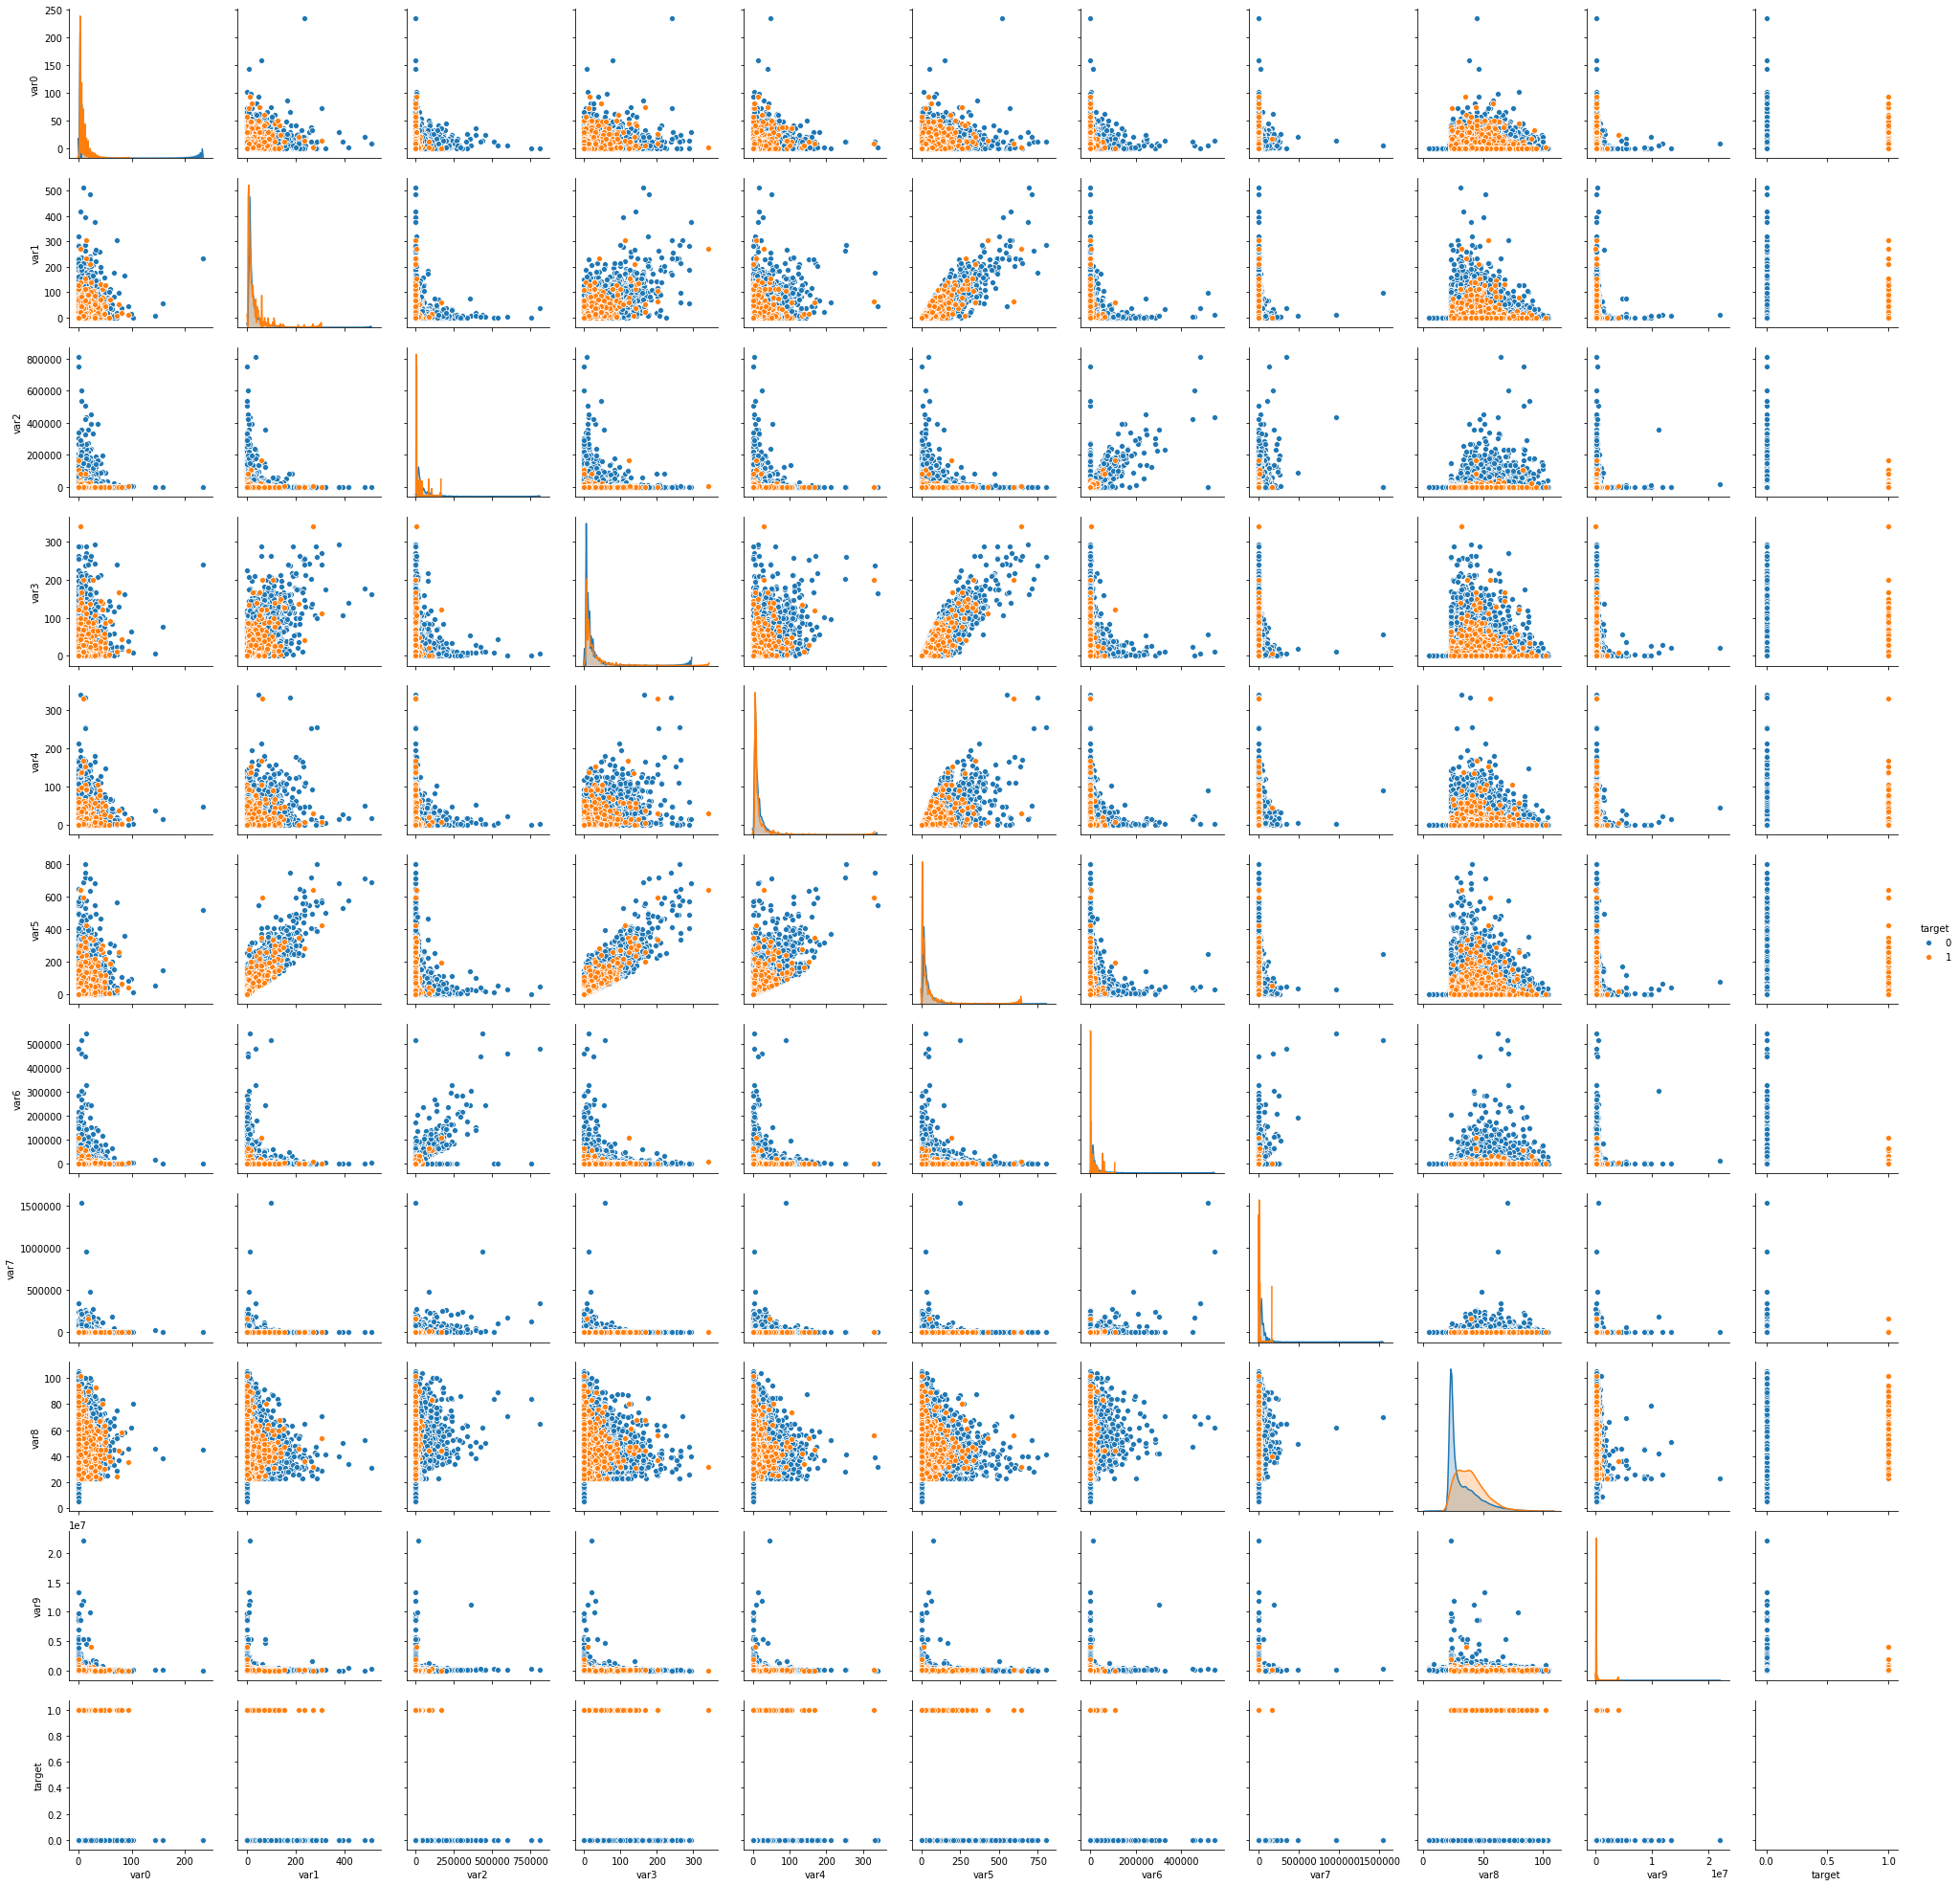

In [22]:
sns.pairplot(treinoRF, hue = "target")

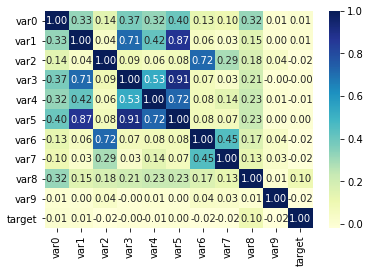

In [25]:
#Analisando a correlação entre as variáveis
sns.heatmap(treinoRF.corr(), annot=True, fmt=".2f",cmap="YlGnBu")

Vamos confirmar, a partir de bloxplots, a existencia de *outliers*

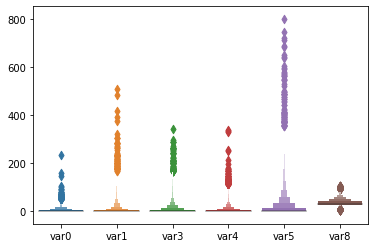

In [29]:
sns.boxenplot(data = treinoRF[['var0','var1','var3','var4','var5','var8']])

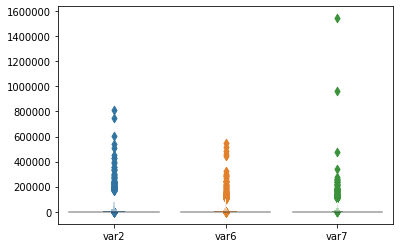

In [32]:
sns.boxenplot(data = treinoRF.drop(columns = ['var0','var1','var3','var4','var5','var8','var9','target']))

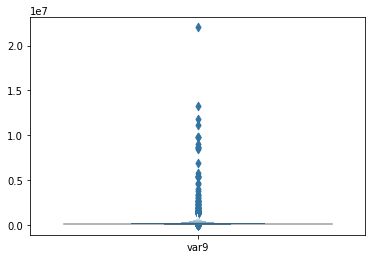

In [28]:
sns.boxenplot(data = treinoRF[['var9']])

In [154]:
#Salvando o arquivo com as dimensões reduzidas
treinoRF.to_csv("treinoRF.csv",index=False)

## Tratamento dos dados: remoção dos *outliers*

Vamos carregar os dados do <font color = green> __treinoRF.csv__ </font>

In [29]:
treinoRF = pd.read_csv('treinoRF.csv')
treinoRF

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,target
0,0,0,0.00,0,0,0,0.00,0.00,23,39205.170000,0
1,0,0,0.00,0,0,0,0.00,88.89,34,49278.030000,0
2,0,0,3.00,0,0,0,2.07,0.18,23,67333.770000,0
3,3,18,186.09,27,3,48,138.84,0.00,37,64007.970000,0
4,9,0,3.00,0,0,0,13501.47,0.30,39,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0.00,0,0,0,0.00,0.00,48,60926.490000,0
76016,24,9,130.65,36,3,48,0.00,0.00,39,118634.520000,0
76017,0,0,3.00,0,0,0,3.00,0.00,23,74028.150000,0
76018,0,0,3.00,0,0,0,2.58,1.74,25,84278.160000,0


Nota-se um volume muito alto de outliers na base de dados. Para facilitar a modelagem, vamos tratá-los

In [33]:
#Vamos verificar quantos sao os dados, de cada variavel, que estão acima de 3 desvios padrões
desvio = explore_describe(treinoRF).set_index('variable')['std']
quat75 = explore_describe(treinoRF).set_index('variable')['quat75']
quat75

variable
var0           3.00
var1           3.00
var2          90.00
var3           3.00
var4           3.00
var5          12.00
var6          83.79
var7          12.22
var8          40.00
var9      118756.25
target         0.00
Name: quat75, dtype: float64

In [9]:
#Este resultado mostra a quantidade de outliers dentro do dataset treinoRF (percentualmente)
pd.DataFrame({'Porcent3desvios':[100*(len(treinoRF[treinoRF[x]>3*desvio[x]]))/len(treinoRF[x]) \
                                 for x in quat75.index]}).set_index(desvio.index).iloc[0:-1,:]

,Porcent3desvios
variable,
var0,2.879505
var1,2.042883
var2,1.052355
var3,2.355959
var4,2.428308
var5,2.354644
var6,0.906340
var7,0.786635
var8,26.820574


Verificando comportamento da var8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018012F793C8>]],
      dtype=object)

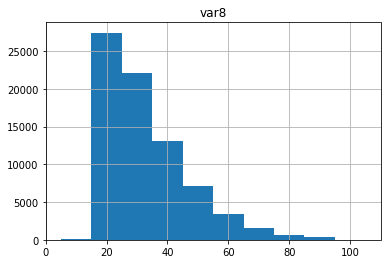

In [10]:
treinoRF[['var8']].hist() 

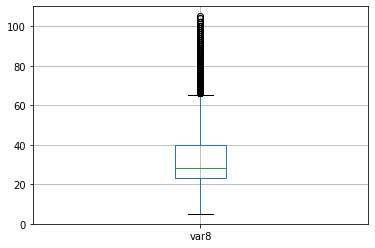

In [11]:
treinoRF[['var8']].boxplot() 

In [34]:
#Vamos jogar os dados outliers para a media (sem considerar os outliers)
colunas = treinoRF.columns
colunas = colunas[0:len(colunas)-1]
for cada_colunas in colunas:
    medias = treinoRF.loc[np.abs(treinoRF[cada_colunas]) <= 3*desvio[cada_colunas],cada_colunas].mean()
    treinoRF.loc[np.abs(treinoRF[cada_colunas]) > 3*desvio[cada_colunas],cada_colunas] = medias
treinoRF

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,target
0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.00,23.000000,39205.170000,0
1,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,88.89,34.000000,49278.030000,0
2,0.000000,0.0,3.00,0.0,0.0,0.0,2.07,0.18,23.000000,67333.770000,0
3,3.000000,18.0,186.09,27.0,3.0,48.0,138.84,0.00,37.000000,64007.970000,0
4,9.000000,0.0,3.00,0.0,0.0,0.0,13501.47,0.30,26.644677,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...
76015,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.00,26.644677,60926.490000,0
76016,2.308258,9.0,130.65,36.0,3.0,48.0,0.00,0.00,26.644677,118634.520000,0
76017,0.000000,0.0,3.00,0.0,0.0,0.0,3.00,0.00,23.000000,74028.150000,0
76018,0.000000,0.0,3.00,0.0,0.0,0.0,2.58,1.74,25.000000,84278.160000,0


## Padronização dos dados

In [13]:
#Vamos deixar os dados padronizados, através da função StandardScaler
parametros_treinoRF = StandardScaler().fit(treinoRF.drop(columns = ['target']))
X = pd.DataFrame(parametros_treinoRF.transform(treinoRF.drop(columns = ['target'])), \
                                     columns = [''.join(('var_pad',str(i))) for i in range(0,len(treinoRF.columns)-1)])
X

,var_pad0,var_pad1,var_pad2,var_pad3,var_pad4,var_pad5,var_pad6,var_pad7,var_pad8,var_pad9
0,-0.559770,-0.426149,-0.220304,-0.498781,-0.493025,-0.558905,-0.245228,-0.165456,-0.908209,-1.090121
1,-0.559770,-0.426149,-0.220304,-0.498781,-0.493025,-0.558905,-0.245228,-0.122922,1.832857,-0.935506
2,-0.559770,-0.426149,-0.219288,-0.498781,-0.493025,-0.558905,-0.244208,-0.165370,-0.908209,-0.658356
3,0.167753,2.354452,-0.157302,3.155307,0.063311,2.183290,-0.176816,-0.165456,2.580421,-0.709406
4,1.622798,-0.426149,-0.219288,-0.498781,-0.493025,-0.558905,6.407485,-0.165313,0.000000,0.108780
...,...,...,...,...,...,...,...,...,...,...
76015,-0.559770,-0.426149,-0.220304,-0.498781,-0.493025,-0.558905,-0.245228,-0.165456,0.000000,-0.756705
76016,0.000000,0.964151,-0.176071,4.373336,0.063311,2.183290,-0.245228,-0.165456,0.000000,0.129095
76017,-0.559770,-0.426149,-0.219288,-0.498781,-0.493025,-0.558905,-0.243750,-0.165456,-0.908209,-0.555599
76018,-0.559770,-0.426149,-0.219288,-0.498781,-0.493025,-0.558905,-0.243957,-0.164624,-0.409833,-0.398264


In [14]:
Y = treinoRF[['target']]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
76015,0
76016,0
76017,0
76018,0


Salvando os parametros da Padronizacao

In [17]:
pickle.dump(parametros_treinoRF,open('parametros_Padronizacao/parametros_Padronizacao.sav','wb'))

## Aplicando a técnica de SMOTE

In [114]:
balanceador = SVMSMOTE()

In [116]:
XY_balanceado = balanceador.fit_resample(X,Y)

Salvando o arquivo balanceado

In [124]:
pd.concat([XY_balanceado[0],XY_balanceado[1]],axis=1).to_csv('treino_balanceado.csv',index = False)

In [125]:
XY_balanceado[1].groupby('target').target.count()

target
0    73012
1    73012
Name: target, dtype: int64

## Aplicando agora algoritmos para classificação

In [24]:
#Lendo o arquivo de treino balanceado
treino_balanceado = pd.read_csv('treino_balanceado.csv')
X = treino_balanceado.iloc[:,0:len(treino_balanceado.columns)-1]
Y = treino_balanceado.iloc[:,len(treino_balanceado.columns)-1]

In [59]:
modelosf1 = []
modelosf1.append(('LR', LogisticRegression()))
modelosf1.append(('LDA', LinearDiscriminantAnalysis()))
modelosf1.append(('NB', GaussianNB()))
modelosf1.append(('KNN', KNeighborsClassifier()))
modelosf1.append(('CART', DecisionTreeClassifier()))
modelosf1.append(('XGB',XGBClassifier()))
modelosf1.append(('GB',GradientBoostingClassifier()))
modelosf1.append(('AB',AdaBoostClassifier()))
modelosf1.append(('RF',RandomForestClassifier()))

In [60]:
# Avaliando cada modelo em um loop
num_folds = 10
resultadosf1 = []
nomesf1 = []

for nome, modelo in modelosf1:
    t0= time.clock()
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'f1')
    resultadosf1.append(cv_results)
    nomesf1.append(nome)
    t1 = time.clock()-t0
    msg = "%s: %f (%f) - Tempo execucao: %.0f s" % (nome, cv_results.mean(), cv_results.std(),t1)
    print(msg)

LR: 0.482422 (0.365810) - Tempo execucao: 4 s
LDA: 0.468700 (0.366142) - Tempo execucao: 2 s
NB: 0.515169 (0.434000) - Tempo execucao: 1 s
KNN: 0.603264 (0.320064) - Tempo execucao: 148 s
CART: 0.618252 (0.347048) - Tempo execucao: 6 s
XGB: 0.626077 (0.357405) - Tempo execucao: 42 s
GB: 0.583547 (0.353270) - Tempo execucao: 130 s
AB: 0.557619 (0.361661) - Tempo execucao: 38 s
RF: 0.652853 (0.320067) - Tempo execucao: 132 s


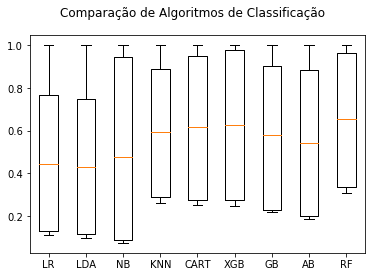

In [61]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultadosf1)
ax.set_xticklabels(nomesf1)
plt.show()

In [62]:
#Inicializando uma lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('XGB',XGBClassifier()))
modelos.append(('GB',GradientBoostingClassifier()))
modelos.append(('AB',AdaBoostClassifier()))
modelos.append(('RF',RandomForestClassifier()))

LR: 0.668543 (0.133438) - Tempo execucao: 4 s
LDA: 0.633994 (0.149093) - Tempo execucao: 2 s
NB: 0.583831 (0.327859) - Tempo execucao: 1 s
KNN: 0.870220 (0.057919) - Tempo execucao: 160 s
CART: 0.912625 (0.037050) - Tempo execucao: 6 s
XGB: 0.932307 (0.039850) - Tempo execucao: 43 s
GB: 0.872665 (0.051948) - Tempo execucao: 135 s
AB: 0.825345 (0.070585) - Tempo execucao: 39 s
RF: 0.934949 (0.027119) - Tempo execucao: 136 s


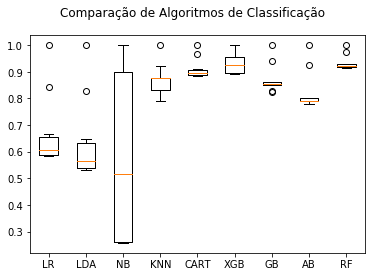

In [7]:
# Avaliando cada modelo em um loop
num_folds = 10
resultados = []
nomes = []

for nome, modelo in modelos:
    t0= time.clock()
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    t1 = time.clock()-t0
    msg = "%s: %f (%f) - Tempo execucao: %.0f s" % (nome, cv_results.mean(), cv_results.std(),t1)
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Otimizando o modelo

A partir dos resultados acima, vamos selecionar o modelo de Random Forest, que apresentou os melhores resultados e pouca variação entre eles e vamos aplicar técnicas de *tuning* para tentar melhorar o resultado

In [63]:
#Quantidade de iterações
iterations = 100

# Definindo os valores que serão testados
valores_grid = {'n_estimators': [1,10,100,500,1000], 'criterion': ['gini', 'entropy'], 'min_impurity_decrease':[0,0.1,0.5,1,5,10]}

# Criando o modelo
modelo = RandomForestClassifier()

# Criando o grid e utilizando como score (padrão) a acurácia
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations)
rsearch.fit(X, Y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_impurity_decrease': [0, 0.1, 0.5,
                                                                  1, 5, 10],
                                        'n_estimators': [1, 10, 100, 500,
                                                         1000]})

In [64]:
# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 93.830
Melhores Parâmetros do Modelo:
 RandomForestClassifier(criterion='entropy', min_impurity_decrease=0,
                       n_estimators=500)


A melhora foi pequena, dessa forma, vamos utilizar o segundo melhor modelo (XGBoost) e avaliar como ficam os resultados depois de tuning

In [ ]:
# Definindo os valores que serão testados
valores_grid2 = {'booster':['gbtree', 'gblinear', 'dart'],'objective':['binary:logistic','binary:logitraw','reg:logistic']}

# Criando o modelo
modelo2 = XGBClassifier()

# Criando o grid e utilizando como score (padrão) a acurácia (não foi usado RadomizedSearchCV por questões de simplificação)
rsearch_XG = GridSearchCV(estimator = modelo2, param_grid = valores_grid2, cv = KFold(n_splits=10))
rsearch_XG.fit(X, Y)

In [27]:
print("Acurácia: %.3f" % (rsearch_XG.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch_XG.best_estimator_)

Acurácia: 93.231
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


<font color = green> __O modelo com Random Forest teve uma acurácia de 93,8%, portanto, iremos usá-lo para predizer os dados de teste__</font>

## Salvando os modelos

In [66]:
pickle.dump(rsearch.best_estimator_, open('modelos/modelo_RF.sav', 'wb'))
pickle.dump(rsearch_XG.best_estimator_,open('modelos/modelo_XG.sav','wb'))
print("Modelos salvo!")

Modelos salvo!


## Carregando os modelos, os parâmetros para padronização e realizando os testes com os modelos

In [17]:
modeloRF = pickle.load(open('modelos/modelo_RF.sav','rb'))
modeloXG = pickle.load(open('modelos/modelo_XG.sav','rb'))
parametros = pickle.load(open('parametros_Padronizacao/parametros_Padronizacao.sav','rb'))
colunas = pickle.load(open('colunas_treino/colunas.sav','rb'))

In [18]:
#Carregando os dados de teste
teste = pd.read_csv('test.csv',header = 0)
teste

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [19]:
#Selecionando as colunas relevantes para o modelo de classificação
teste_colunas_alvo = teste[colunas]

In [20]:
#Padroniza os dados de teste, conforme os dados de treino
teste_padronizado = parametros.transform(teste_colunas_alvo)
teste_padronizado

array([[-0.55976998, -0.42614949, -0.21827226, ..., -0.16315965,
         1.33448156, -1.06975319],
       [-0.55976998, -0.42614949, -0.21928792, ..., -0.16409274,
         2.08204512, -0.99370126],
       [ 0.16775264, -0.42614949, -0.18983365, ..., -0.13380321,
        -0.90820912, -0.97056573],
       ...,
       [-0.55976998, -0.42614949, -0.18983365, ..., -0.13210929,
        -0.65902127,  0.87609246],
       [-0.55976998, -0.42614949, -0.21928792, ..., -0.16419323,
         3.32798438,  0.10877954],
       [-0.55976998, -0.42614949, -0.18983365, ..., -0.12471635,
        -0.90820912,  0.10877954]])

In [22]:
#Aplicando o modelo Random Forest aos dados de teste e salvando o resultado
pd.DataFrame({'ID': teste['ID'].to_list(),'TARGET': modeloRF.predict(teste_padronizado)}).to_csv('submission.csv',index=False)